# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction-to-Computer-Vision" data-toc-modified-id="Introduction-to-Computer-Vision-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Computer Vision</a></div><div class="lev2 toc-item"><a href="#2A-L5:-15" data-toc-modified-id="2A-L5:-15-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>2A-L5: 15</a></div><div class="lev2 toc-item"><a href="#2A-L6:-8" data-toc-modified-id="2A-L6:-8-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2A-L6: 8</a></div><div class="lev2 toc-item"><a href="#3A-L1:-12" data-toc-modified-id="3A-L1:-12-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3A-L1: 12</a></div><div class="lev2 toc-item"><a href="#3A-L2:-7" data-toc-modified-id="3A-L2:-7-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>3A-L2: 7</a></div><div class="lev2 toc-item"><a href="#3B-L3:-3" data-toc-modified-id="3B-L3:-3-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>3B-L3: 3</a></div><div class="lev2 toc-item"><a href="#3B-L3:-9" data-toc-modified-id="3B-L3:-9-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>3B-L3: 9</a></div>

# Introduction to Computer Vision

## 2A-L5: 15

In [ ]:
pkg load image;

In [ ]:
% Gradient Direction
function result = select_gdir0(gmag, gdir, mag_min, angle_low, angle_high)
    % TODO Find and return pixels that fall within the desired mag, angle range
    gmag(gmag < mag_min) = 0;
    gmag(angle_low > gdir) = 0;
    gmag(gdir > angle_high) = 0;
    result = gmag;
endfunction

function result = select_gdir(gmag, gdir, mag_min, angle_low, angle_high)
    % TODO Find and return pixels that fall within the desired mag, angle range
    % gmag(gmag < mag_min) = 0;
    % gmag(gdir < angle_low) = 0;
    % gmag(gdir > angle_high) = 0;
    % result = gmag;
    result = gmag >= mag_min & angle_low <= gdir & gdir <= angle_high;
endfunction

In [ ]:
assert(    
    select_gdir0(gmag, gdir, 1, 30, 60) == select_gdir(gmag, gdir, 1, 30, 60)
)

In [ ]:
%% Load and convert image to double type, range [0, 1] for convenience
img = double(imread('octagon.png')) / 255.; 
imshow(img); % assumes [0, 1] range for double images

In [ ]:
%% Compute x, y gradients
[gx gy] = imgradientxy(img, 'sobel'); % Note: gx, gy are not normalized

%% Obtain gradient magnitude and direction
[gmag gdir] = imgradient(gx, gy);
imshow(gmag / (4 * sqrt(2))); % mag = sqrt(gx^2 + gy^2), so [0, (4 * sqrt(2))]

In [ ]:
imshow((gdir + 180.0) / 360.0); % angle in degrees [-180, 180]

In [ ]:
%% Find pixels with desired gradient direction
my_grad = select_gdir(gmag, gdir, 1, 30, 60); % 45 +/- 15

imshow(my_grad);  % NOTE: enable after you've implemented select_gdir

## 2A-L6: 8

In [ ]:
% edge(img, 'canny')

In [ ]:
frizzy = imread('frizzy.png');
froomer = imread('froomer.png');
imshow(frizzy);

In [ ]:
imshow(froomer);

In [ ]:
% TODO: Find edges in frizzy and froomer images
gfrizzy = rgb2gray(frizzy);
efrizzy = edge(gfrizzy, 'canny');

imshow(efrizzy);

In [ ]:
gfroomer = rgb2gray(froomer);
efroomer = edge(gfroomer, 'canny');

imshow(efroomer);

In [ ]:
% TODO: Display common edge pixels
imgcommon = efrizzy & efroomer;

imshow(imgcommon);
% imgcommon

## 3A-L1: 12

In [ ]:
# Thin lens equation 
# (1/||z'||)+(1/||z||) = 1/f
# arctan((d/2)/f)

In [ ]:
% z
d = 35 % mm
w = 700 % mm
f = 50 % mm

% z' = (d*f)/w+f
z1 = (d*f)/w+f
assert(z1 == 52.5)
% z = (w/d)*z'
z = (w/d)*z1
assert(z/1000 == 1.05)

## 3A-L2: 7

In [ ]:
% Project a point from 3D to 2D using a matrix operation

%% Given: Point p in 3-space [x y z], and focal length f
%% Return: Location of projected point on 2D image plane [u v]
function p_img = project_point(p, f)
    %% TODO: Define and apply projection matrix
    [x y z] = num2cell(p){:};
    p_img = [f*(x/z) f*(y/z)];
endfunction

%% Test: Given point and focal length (units: mm)
assert(project_point([200 100 50], 50) == [200 100])
assert(project_point([-350 150 50], 50) == [-350 150])
assert(project_point([200 100 100], 50) == [100 50])

## 3B-L3: 3

In [ ]:
% Find best match
function best_x = find_best_match(patch, strip)
    % TODO: Find patch in strip and return column index (x value) 
    % of topleft corner
    c = normxcorr2(patch, strip);
    [ypeak, xpeak] = find(c==max(c(:)));
    best_x = xpeak - size(patch, 2);
endfunction

pkg load image;

% Test code:

%% Load images
left = double(imread('flowers-left.png'));
right = double(imread('flowers-right.png'));

figure, imshow(left/255);

figure, imshow(left/255);

%% Convert to grayscale, double, [0, 1] range for easier computation
left_gray = double(rgb2gray(left)) / 255.0;
right_gray = double(rgb2gray(right)) / 255.0;

%% Define image patch location (topleft [row col]) and size
patch_loc = [120 170];
patch_size = [100 100];

%% Extract patch (from left image)
patch_left = left_gray(
    patch_loc(1):(patch_loc(1) + patch_size(1) - 1), 
    patch_loc(2):(patch_loc(2) + patch_size(2) - 1)
);
figure, imshow(patch_left);

%% Extract strip (from right image)
strip_right = right_gray(
    patch_loc(1):(patch_loc(1) + patch_size(1) - 1), :
);
figure, imshow(strip_right);

%% Now look for the patch in the strip and report the best position 
%% (column index of topleft corner)
best_x = find_best_match(patch_left, strip_right);
disp(best_x);

patch_right = right_gray(
    patch_loc(1):(patch_loc(1) + patch_size(1) - 1), 
    best_x:(best_x + patch_size(2) - 1)
);
figure, imshow(patch_right);

## 3B-L3: 9

  -106    21    20    97    14


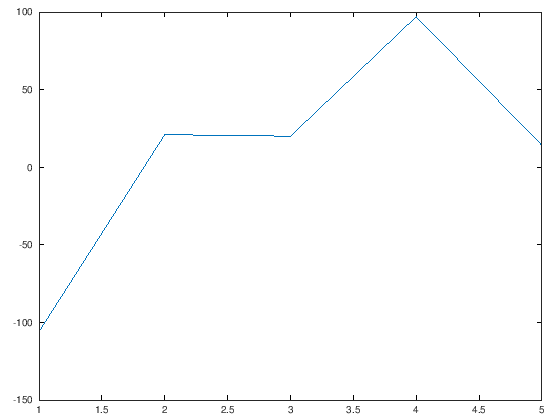

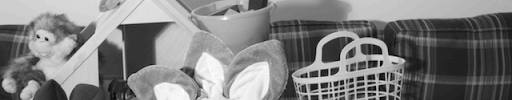

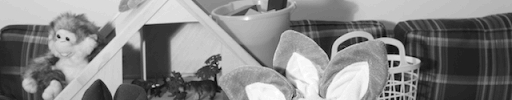

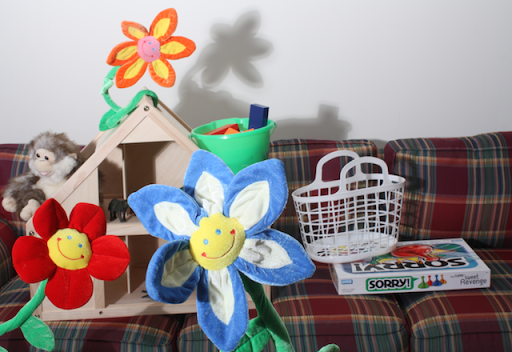

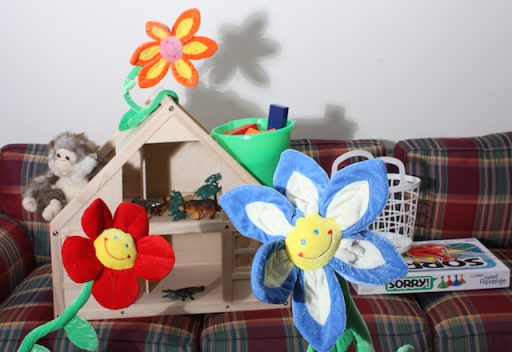

In [16]:
% TODO: Match two strips to compute disparity values
function disparity = match_strips(strip_left, strip_right, b)
    % For each non-overlapping patch/block of width b in the left strip,
    %   find the best matching position (along X-axis) in the right strip.
    % Return a vector of disparities (left X-position - right X-position).
    % Note: Only consider whole blocks that fit within image bounds.
    num_blocks = floor(size(strip_left, 2) / b);
    
    disparity = zeros([1 num_blocks]);
    for block = 0:(num_blocks-1)
        x_left = block * b + 1;
        
        patch_left = strip_left(:, x_left:(x_left + b - 1));
        
        x_right = find_best_match(patch_left, strip_right);
        
        disparity(1, block+1) = (x_left - x_right);
    end
endfunction

% Find best match for a patch in a given strip (SSD)
% Note: You may use this or roll your own
function best_x = find_best_match(patch, strip)
    min_diff = Inf;
    best_x = 0; % column index (x value) of topleft corner; haven't found it yet
    for x = 1:(size(strip)(2) - size(patch)(2))
        other_patch = strip(:, x:(x + size(patch)(2) - 1));
        diff = sumsq((patch - other_patch)(:));
        if diff < min_diff
            min_diff = diff;
            best_x = x;
        endif
    endfor
endfunction

pkg load image;

% Test code:

%% Load images
left = double(imread('flowers-left.png'));
right = double(imread('flowers-right.png'));
figure, imshow(left/255.0);
figure, imshow(right/255.0);

%% Convert to grayscale, double, [0, 1] range for easier computation
left_gray = rgb2gray(left) / 255.0;
right_gray = rgb2gray(right) / 255.0;

%% Define strip row (y) and square block size (b)
y = 120;
b = 100;

%% Extract strip from left image
strip_left = left_gray(y:(y + b - 1), :);
figure, imshow(strip_left);

%% Extract strip from right image
strip_right = right_gray(y:(y + b - 1), :);
figure, imshow(strip_right);

%% Now match these two strips to compute disparity values
disparity = match_strips(strip_left, strip_right, b);
disp(disparity);
%plot gnuplot
figure, plot(disparity);